#### Importar as Bibliotecas Necessárias

In [24]:
import pandas as pd #Objetivo: Importa a biblioteca pandas, usada para manipulação de dados e operações com DataFrames.
import numpy as np #Objetivo: Importa a biblioteca NumPy, utilizada para operações numéricas e manipulação eficiente de arrays.
import matplotlib.pyplot as plt #Objetivo: Importa a biblioteca Matplotlib, usada para criar gráficos e visualizações.
import seaborn as sns #Objetivo: Importa a biblioteca Seaborn, que facilita a criação de gráficos estatísticos e a visualização de dados.
from sklearn.datasets import load_wine #Objetivo: Carrega a função load_wine do scikit-learn, usada para importar o conjunto de dados Wine, que contém informações sobre amostras de vinho para análise de classificação.

#### Carregar o Conjunto de Dados
obs: usando o conjunto de dados embutido do scikit-learn.
obs: a outra opcao e baixando o arquivo

In [25]:
wine_sklearn = load_wine() #Objetivo: Carrega o conjunto de dados Wine do scikit-learn e armazena em wine_sklearn. Este dataset contém dados sobre diferentes características químicas de amostras de vinho.
wine_data = pd.DataFrame(wine_sklearn.data, columns=wine_sklearn.feature_names)#Objetivo: Cria um DataFrame do pandas chamado wine_data com os dados do conjunto Wine, atribuindo os nomes das colunas baseados nas características (features) do vinho.
wine_data['target'] = wine_sklearn.target#Objetivo: Adiciona uma nova coluna chamada 'target' ao DataFrame wine_data, contendo os valores de classificação (ou rótulos) do conjunto de dados, que representam o tipo de vinho (as classes).

### Visualizacao

In [26]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Exploracao inicial dos Dados

In [27]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

### Estatistica descritiva

In [28]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Analise de distribuicao
distribuição de cada variável

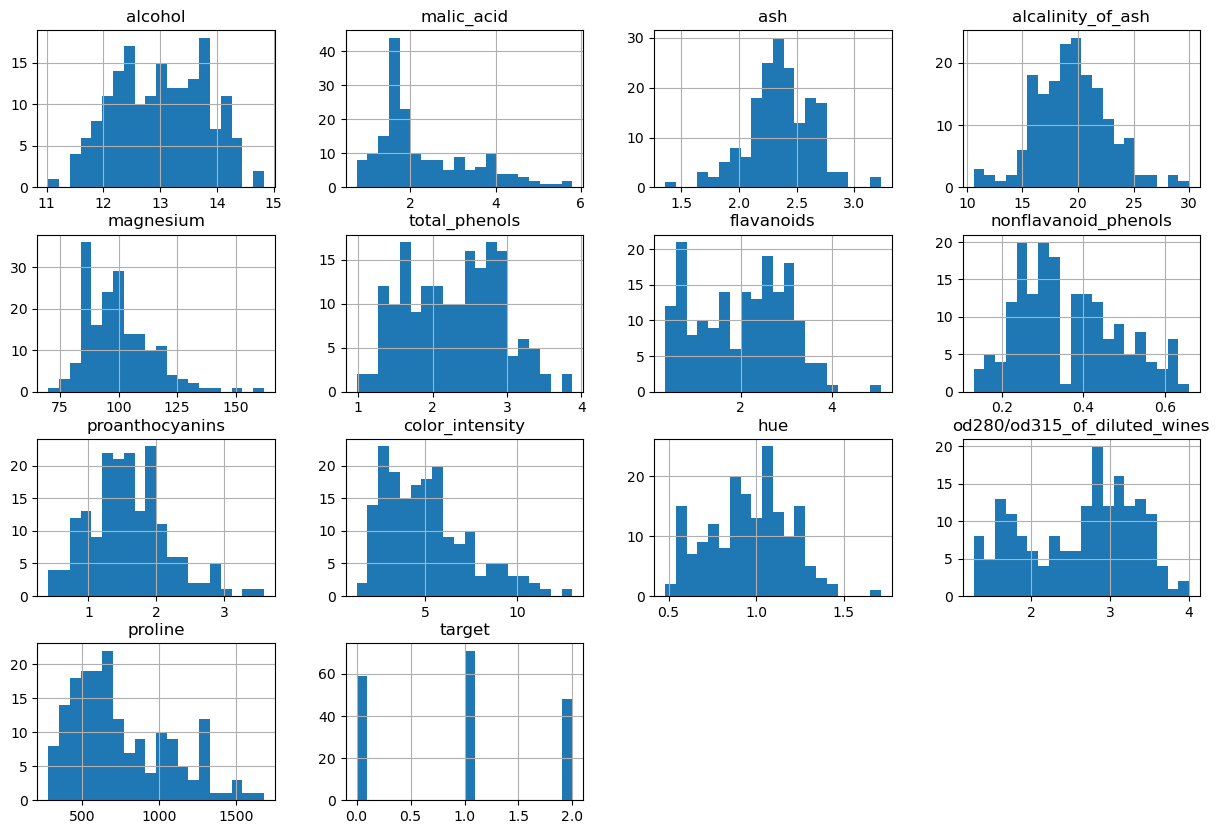

In [31]:
wine_data['target'].value_counts()
wine_data.hist(bins=20, figsize=(15,10))
plt.show()

### Visualizacao de correlacao


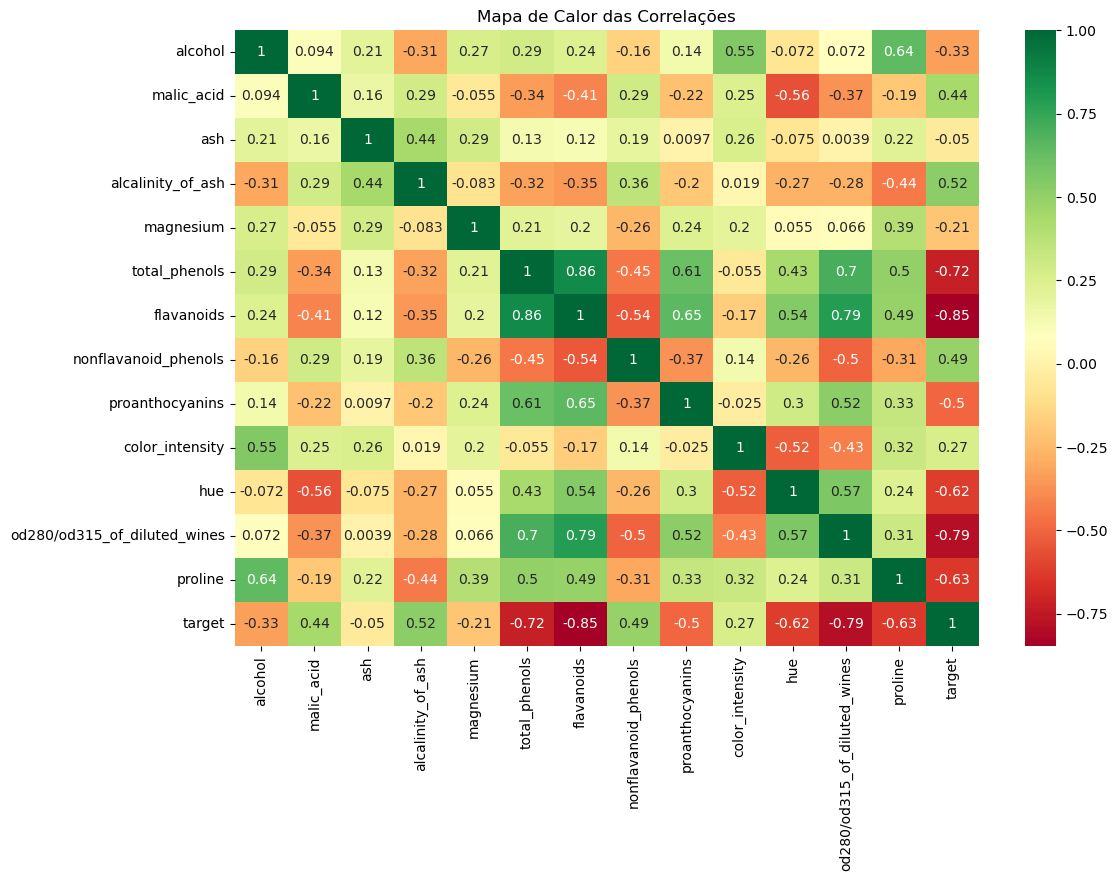

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_data.corr(), annot=True, cmap="RdYlGn")
plt.title('Mapa de Calor das Correlações')
plt.show()


### Visualizacao usando pairplot

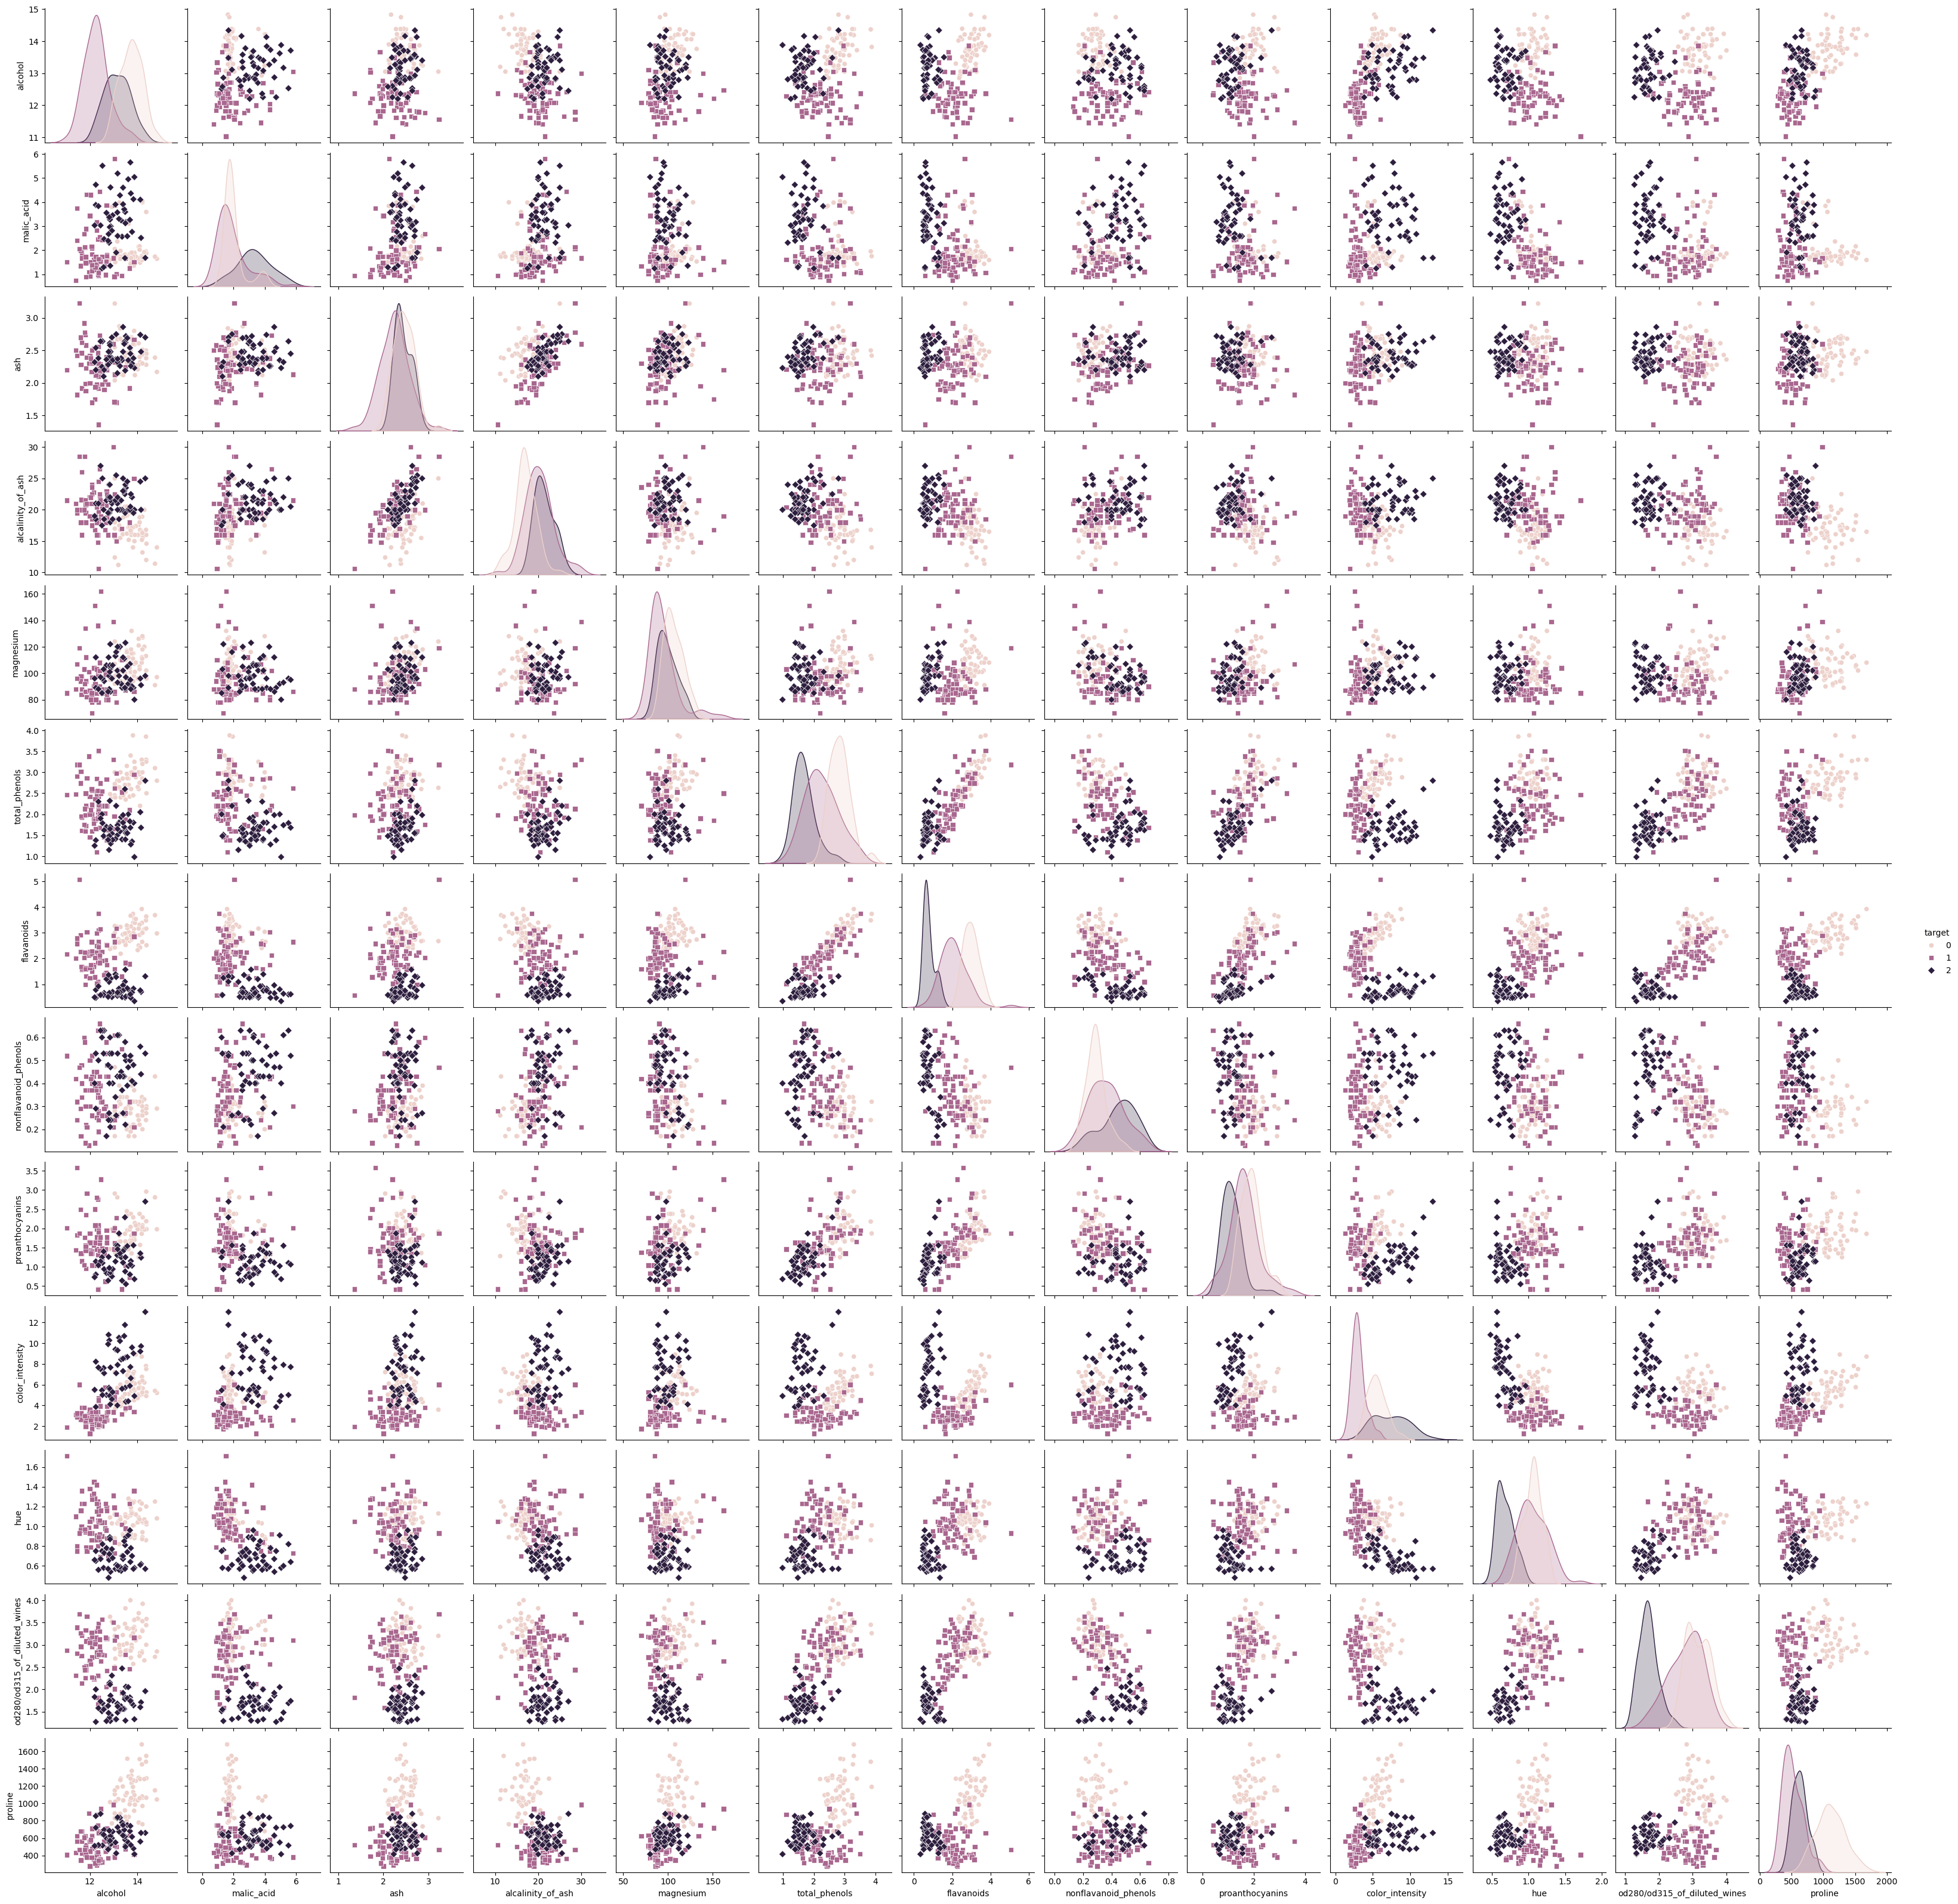

In [33]:
sns.pairplot(wine_data, hue='target', markers=["o", "s", "D"])
plt.show()



# MODELAGEM (estudo)